# Image Processing

## 1. Import libraries/packages

In [1]:
#File management and path extraction
from glob import glob

#Image preprocessing
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS = None

#Image plotting
import matplotlib.pyplot as plt

## 2. Connect to Google Drive Folder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/CS Courses/CS156/Assignments/Final')

## 3. Get image files

In [ ]:
image_files = glob("cityscapes/*")
num_files = len(image_files)
print(f"There are {num_files} images")

There are 7983 images


## 4. Get image aspect ratios
*Adapted from [Robert Gonsalves](https://github.com/robgon-art/GANscapes/blob/main/2_GANscapes_Process_Images.ipynb)*

In [ ]:
#Create a list to store the image aspect ratios
aspect_ratios = np.zeros(num_files)

#Iterate through all the images
for i, file in enumerate(image_files):

  #Open the image
  img = Image.open(file)

  #Get its width and height
  width, height = img.size

  #Calculate the image aspect ratio
  aspect_ratio = width/height

  #Note down in the list
  aspect_ratios[i] = aspect_ratio

  #Print progress over time
  if (i != 0) and (i%500 == 0):
    print(f"{i} images. Median aspect ratio: {np.median(aspect_ratios[:i])}")

500 images. Median aspect ratio: 1.5
1000 images. Median aspect ratio: 1.4992458521870287
1500 images. Median aspect ratio: 1.4974149434435664
2000 images. Median aspect ratio: 1.4992458521870287
2500 images. Median aspect ratio: 1.4609941520467835
3000 images. Median aspect ratio: 1.3347731441776252
3500 images. Median aspect ratio: 1.4948623099054665
4000 images. Median aspect ratio: 1.4981273408239701
4500 images. Median aspect ratio: 1.4992428424751183
5000 images. Median aspect ratio: 1.4995927439031607
5500 images. Median aspect ratio: 1.499796412854174
6000 images. Median aspect ratio: 1.4998037676306852
6500 images. Median aspect ratio: 1.4998120287734482
7000 images. Median aspect ratio: 1.4997983010422442
7500 images. Median aspect ratio: 1.499408641844329


In [ ]:
#Save the aspect ratios to avoid recomputation
np.save("image_aspect_ratios.npy",aspect_ratios)

In [ ]:
#Aspect ratio summary stats (we see there are clearly some portrait images)
print(aspect_ratios)
print(aspect_ratios.mean())
print(np.median(aspect_ratios))
median_aspect_ratio = np.median(aspect_ratios)

[0.66672294 1.50013337 0.66672375 ... 1.51851852 0.66653846 1.5       ]
1.2262220975725668
1.4992458521870287


## 4. Resize Images
*Adapted from [Robert Gonsalves](https://github.com/robgon-art/GANscapes/blob/main/2_GANscapes_Process_Images.ipynb)*

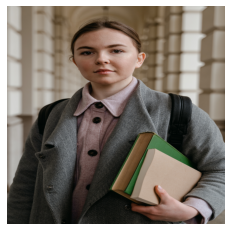

0 cityscapes_resized_1024/7251099.jpeg


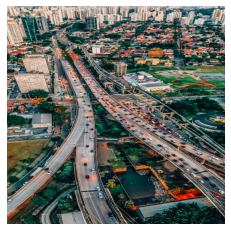

500 cityscapes_resized_1024/5048837.jpeg


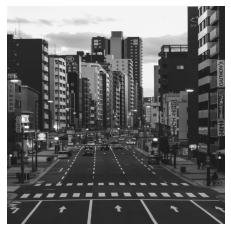

1000 cityscapes_resized_1024/3969491.jpeg


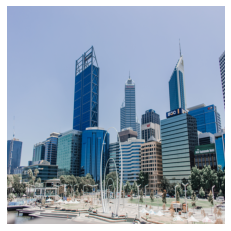

1500 cityscapes_resized_1024/6761495.jpeg


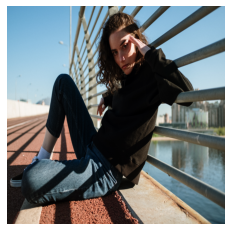

2000 cityscapes_resized_1024/4570989.jpeg


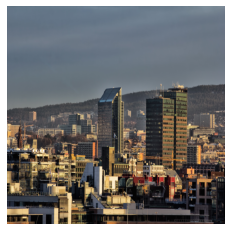

2500 cityscapes_resized_1024/9319696.jpeg


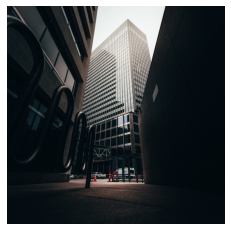

3000 cityscapes_resized_1024/4117560.jpeg


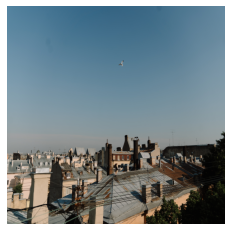

3500 cityscapes_resized_1024/4979416.jpeg


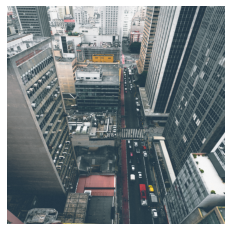

4000 cityscapes_resized_1024/243752.jpeg


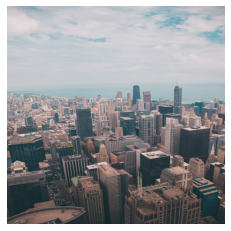

4500 cityscapes_resized_1024/2225755.jpeg


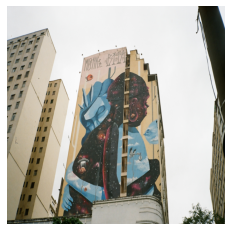

5000 cityscapes_resized_1024/1048249.jpeg


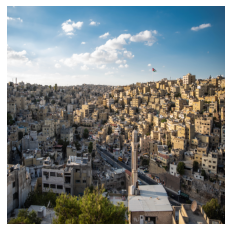

5500 cityscapes_resized_1024/1631661.jpeg


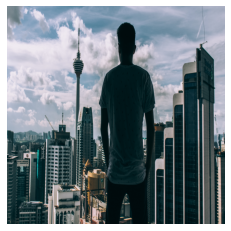

6000 cityscapes_resized_1024/303159.jpeg


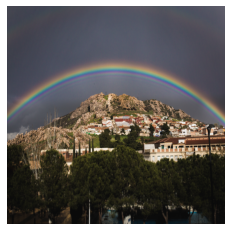

6500 cityscapes_resized_1024/1002695.jpeg


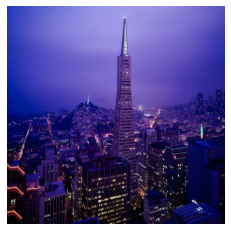

7000 cityscapes_resized_1024/transamerica-pyramid-1633203_1280.jpeg


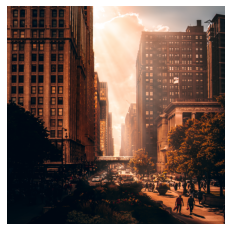

7500 cityscapes_resized_1024/2962288.jpeg


In [ ]:
#Iterate through all the images
for i, file in enumerate(image_files):

  #Open each image
  img = Image.open(file)

  #Get height and width
  width, height = img.size
  
  #Get aspect ratio
  aspect_ratio = aspect_ratios[i]

  #Get the image mode
  mode = img.mode
  if mode is not "RGB":
    continue

  #If the aspect ratio is greater than the median aspect ratio
  if (aspect_ratio > median_aspect_ratio):

    #Crop the image
    new_width = height * median_aspect_ratio
    delta = width - new_width
    img_cropped = img.crop(((delta/2, 0, width-delta/2, height)))
  
  #If not:
  else:

    #Resize image
    new_height = width / median_aspect_ratio
    delta = height - new_height
    img_cropped = img.crop(((0, delta/2, width, height-delta/2)))

  #Resize image
  img_resized = img.resize((1024, 1024))

  #Store images in new folder
  save_path = file.replace("cityscapes", "cityscapes_resized_1024")
  img_resized.save(save_path)

  if i%500 == 0:
    imgplot = plt.imshow(img_resized)
    plt.axis("off")
    plt.show()
    print(i, save_path)

---
### 5. Resize to 256 x 256

#### a. Get the files to resized

In [4]:
image_files_1024 = glob("cityscapes_resized_1024/*")

##### b. Resize the images

In [7]:
#Iterate through all the images
for file in image_files_1024:

  #Open each image
  img = Image.open(file)

  #Resize image
  img_resized = img.resize((256, 256))

  #Store images in new folder
  save_path = file.replace("cityscapes_resized_1024", "cityscapes_resized_256")
  img_resized.save(save_path)